# 01. Explorando e vetorizando dados textuais

## 03. Conhecendo os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vqrca/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [3]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [4]:
df.shape

(15501, 4)

In [5]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [6]:
print('positiva\n')

df.iloc[0]['avaliacao']

positiva



'Esse smartphone superou minhas expectativas, recomendo'

In [7]:
print('negativa\n')

df.iloc[1]['avaliacao']

negativa



'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..'

## 04. Transformando textos em dados numéricos

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [9]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [10]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [11]:
matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df['avaliacao'])
print(bag_of_words.shape)

(15501, 50)


In [13]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacoes

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## 06. Classificando os sentimentos

In [14]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df['sentimento'], random_state=4978)

In [15]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(acuracia)

0.7982456140350878


## 08. Mão na massa: criando uma função para classificação de sentimentos

In [71]:
def classificar_texto(df: pd.DataFrame, col_texto: str, col_sentimentos: str) -> float:
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(df[col_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df[col_sentimentos], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{col_texto}': {acuracia * 100:.2f}")

# 02. Explorando a frequência e o sentimento

## 02. Visualizando as palavras mais frequentes nas avaliações

In [17]:
from wordcloud import WordCloud

In [19]:
todas_palavras = [texto for texto in df['avaliacao']]

In [20]:
todas_palavras[:10]

['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [21]:
todas_palavras = ' '.join([texto for texto in df['avaliacao']])

In [25]:
todas_palavras[:100]

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se i'

In [26]:
nuvem_palavras = WordCloud().generate(todas_palavras)

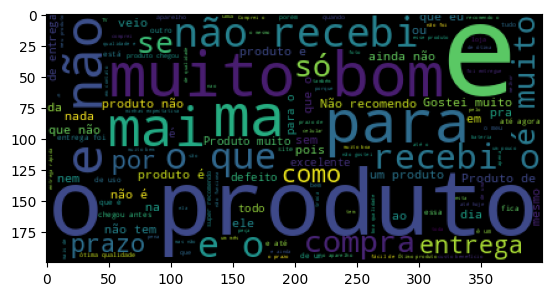

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

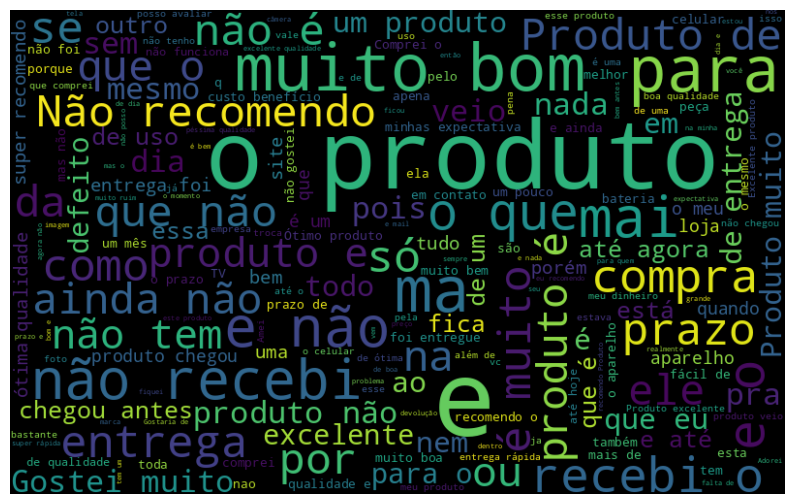

In [31]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

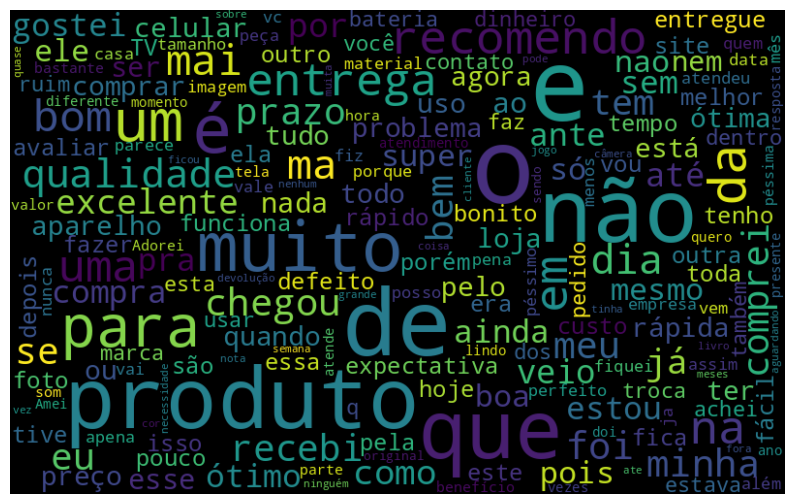

In [32]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

## 03. Analisando palavras por sentimento

In [33]:
def nuvem_palavras(df: pd.DataFrame, col_avaliacao: str, col_sentimento: str) -> None:
    texto_sentimento = df.query(f"sentimento == '{col_sentimento}'")[col_avaliacao]
    texto_unido = ' '.join(texto_sentimento)
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

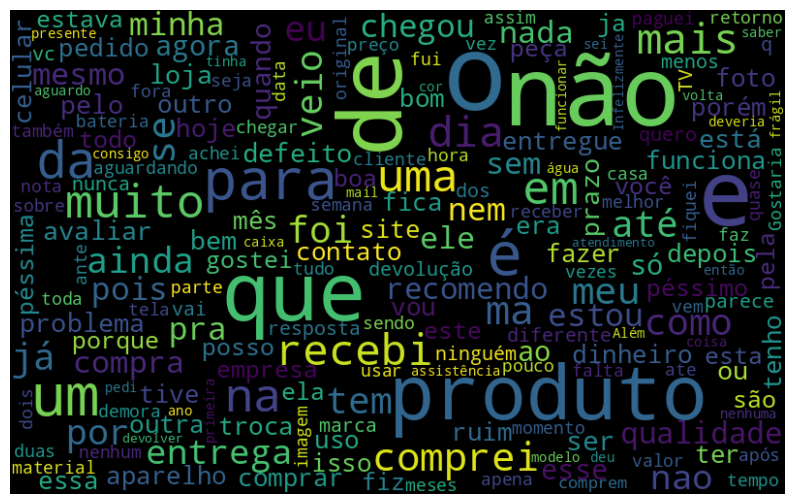

In [34]:
nuvem_palavras(df, 'avaliacao', 'negativo')

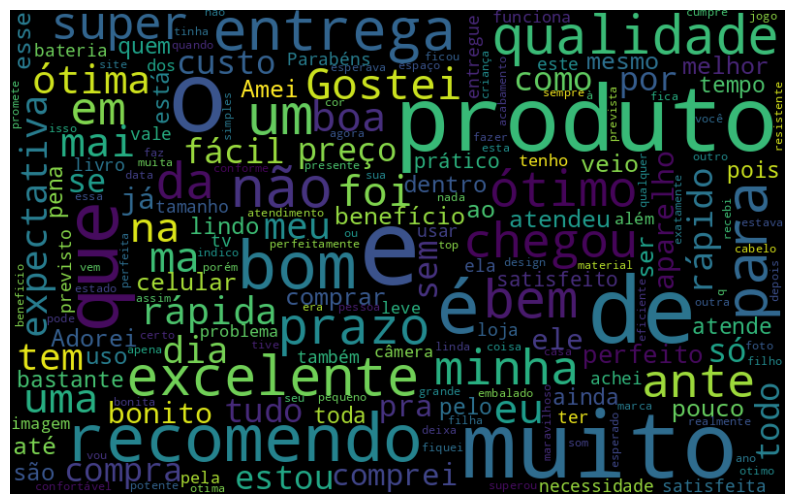

In [35]:
nuvem_palavras(df, 'avaliacao', 'positivo')

## 04. Dividindo o texto em unidades menores

In [48]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/cristoffer_pogan/nltk_data...
[nltk_data]    |   Package averaged_perce

True

In [49]:
frases = ['Um produto bom', 'Um produto ruim']

frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

In [50]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['O',
 'produto',
 'é',
 'excelente',
 'e',
 'a',
 'entrega',
 'foi',
 'muito',
 'rápida!']

## 06. Analisando a frequência das palavras

In [51]:
token_frase = token_espaco.tokenize(todas_palavras)

In [52]:
token_frase[:50]

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu']

In [53]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [56]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [57]:
df_frequencia.head()

,Palavra,Frequência
0,Esse,101
1,smartphone,33
2,superou,90
3,minhas,533
4,"expectativas,",79


In [58]:
df_frequencia.nlargest(10, columns='Frequência')

,Palavra,Frequência
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


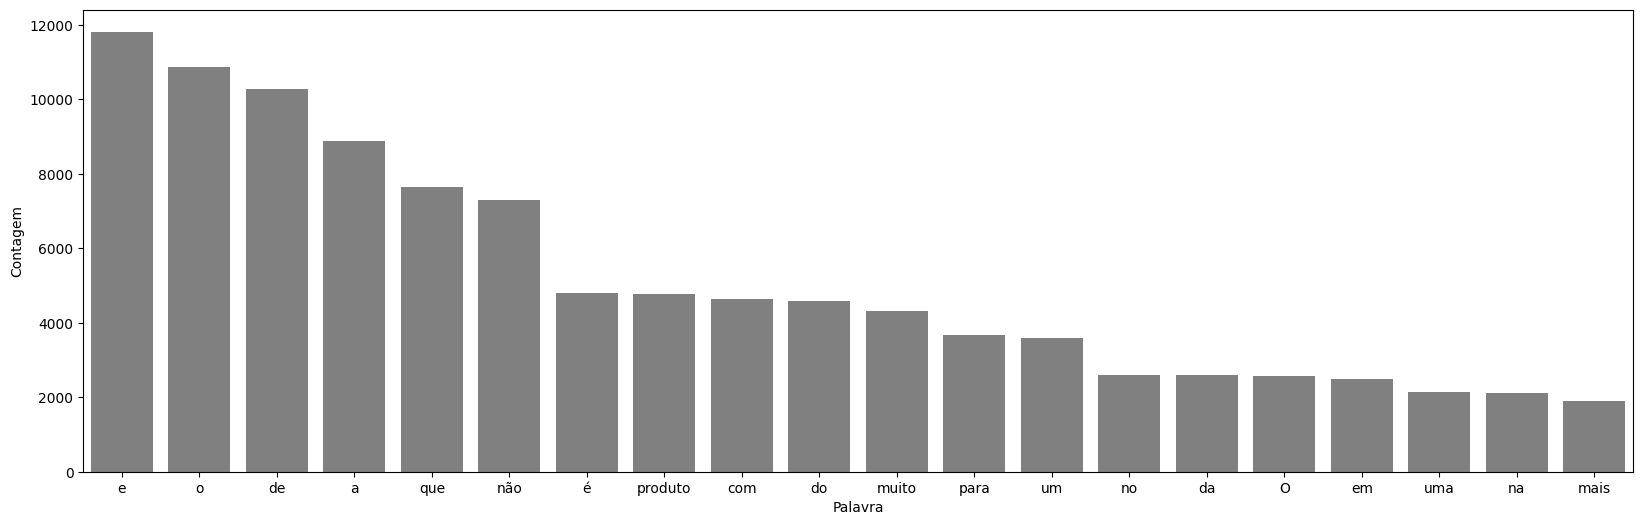

In [60]:
import seaborn as sns

plt.figure(figsize=(20, 6))
ax = sns.barplot(df_frequencia.nlargest(20, columns='Frequência'), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Contagem')
plt.show()

## 08. Mão na massa: criando uma função para visualizar a frequência de palavras

In [76]:
def grafico_frequencia(df: pd.DataFrame, col_texto: str, n_palavras: int) -> None:
    todas_palavras = ' '.join([texto for texto in df[col_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                  'Frequência': list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(n_palavras, columns='Frequência')

    plt.figure(figsize=(20, 6))
    ax = sns.barplot(df_frequencia, x='Palavra', y='Frequência', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

# 03. Limpando e normalizando dados textuais

## 02. Removendo stopwords

In [62]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [64]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [65]:
frase_processada = []
for opiniao in df['avaliacao']:
    palavras_texto = token_espaco.tokenize(opiniao)
    nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
    frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [67]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,tratamento_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [68]:
df.loc[0]['avaliacao']

'Esse smartphone superou minhas expectativas, recomendo'

In [69]:
df.loc[0]['tratamento_1']

'Esse smartphone superou expectativas, recomendo'

In [72]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09


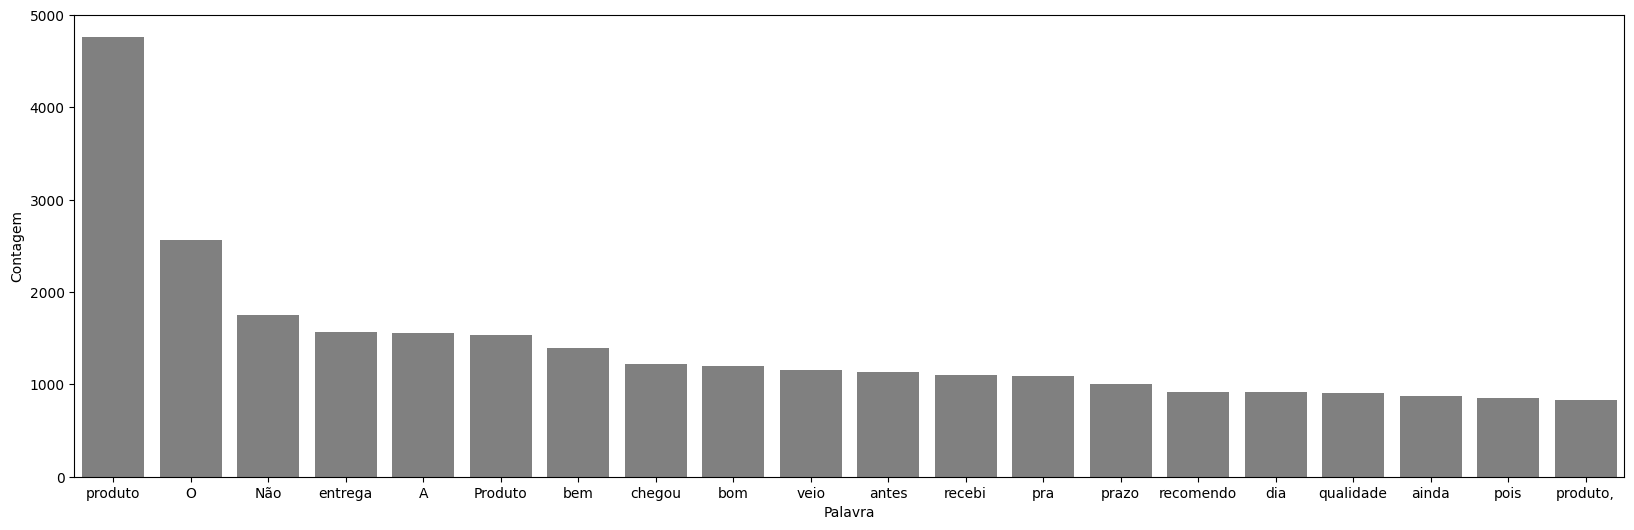

In [77]:
grafico_frequencia(df, 'tratamento_1', 20)